In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.0.0


In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
train_images.shape #60000 images in training group (28 x 28 pixels)

(60000, 28, 28)

In [5]:
len(train_labels)

60000

In [6]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [7]:
test_images.shape #10000 images in testing group (28 x 28 pixels)

(10000, 28, 28)

In [8]:
len(test_labels)

10000

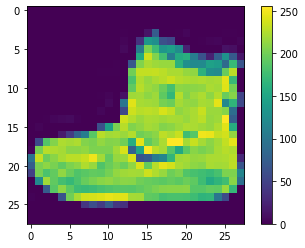

In [9]:
plt.figure()
plt.imshow(train_images[0]) #first image in training images
plt.colorbar()
plt.grid(False)
plt.show()

In [10]:
train_images = train_images / 255.0 #dividing by 255 so that values are betwween 0 and 1

test_images = test_images / 255.0

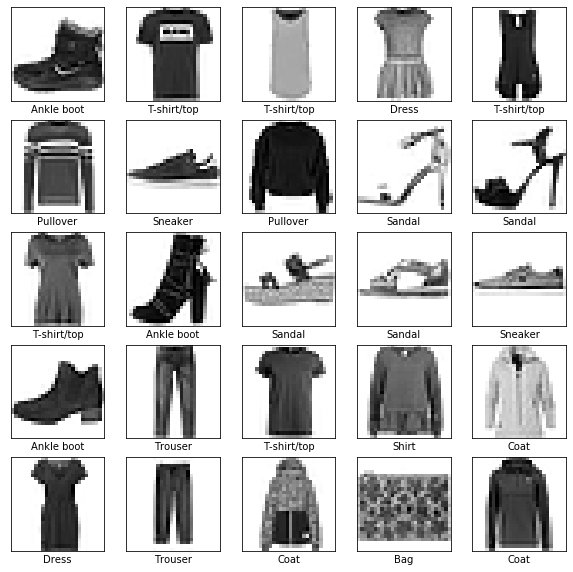

In [11]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [12]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), #lines up pixel values into 1D array
    keras.layers.Dense(128, activation='relu'), #?
    keras.layers.Dense(10, activation='softmax') #returns probability that the image belongs to one of the 10 classes
])

In [13]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 13s 221us/sample - loss: 0.5040 - accuracy: 0.8251
Epoch 2/10
60000/60000 [==============================] - 12s 196us/sample - loss: 0.3774 - accuracy: 0.8639
Epoch 3/10
60000/60000 [==============================] - 15s 246us/sample - loss: 0.3370 - accuracy: 0.8777
Epoch 4/10
60000/60000 [==============================] - 13s 224us/sample - loss: 0.3140 - accuracy: 0.8846
Epoch 5/10
60000/60000 [==============================] - 14s 233us/sample - loss: 0.2971 - accuracy: 0.8902
Epoch 6/10
60000/60000 [==============================] - 13s 209us/sample - loss: 0.2842 - accuracy: 0.8943
Epoch 7/10
60000/60000 [==============================] - 13s 218us/sample - loss: 0.2696 - accuracy: 0.8997
Epoch 8/10
60000/60000 [==============================] - 13s 210us/sample - loss: 0.2593 - accuracy: 0.9034
Epoch 9/10
60000/60000 [==============================] - 13s 220us/sample - loss: 0.2485 - accuracy: 0.9

In [15]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

10000/1 - 1s - loss: 0.2453 - accuracy: 0.8823

Test accuracy: 0.8823


In [16]:
predictions = model.predict(test_images)

In [17]:
predictions[0]

array([1.0617978e-06, 2.0315567e-10, 9.0571572e-10, 7.7438472e-11,
       4.8202149e-09, 3.7369390e-03, 1.0848635e-07, 3.0804973e-02,
       2.5655606e-08, 9.6545690e-01], dtype=float32)

In [18]:
np.argmax(predictions[0])

9

In [19]:
test_labels[0]

9

In [20]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

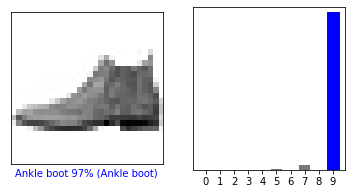

In [21]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

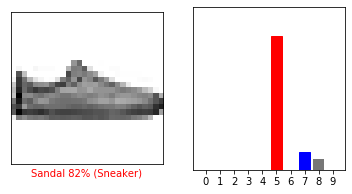

In [22]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

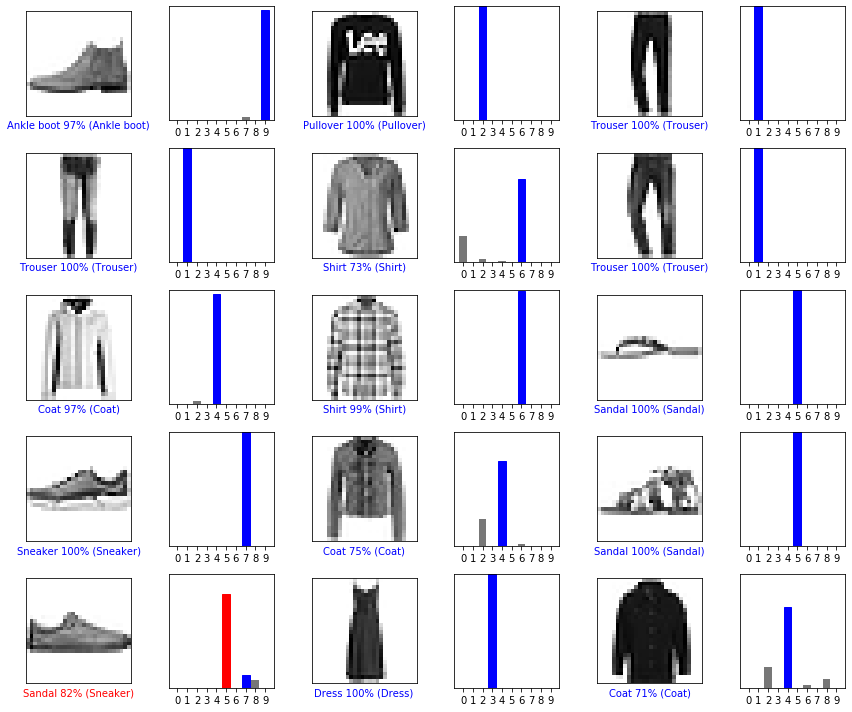

In [23]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [33]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


In [25]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [26]:
predictions_single = model.predict(img)

print(predictions_single)

[[7.6985511e-05 5.6234778e-14 9.9967015e-01 5.3087860e-11 1.9743148e-04
  7.4157458e-10 5.5087108e-05 3.9085742e-15 3.5776162e-07 2.3737794e-18]]


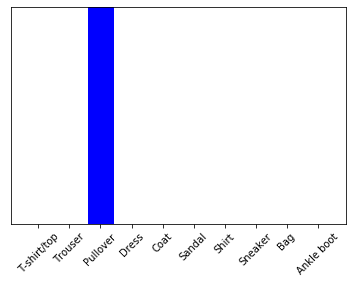

In [27]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [28]:
np.argmax(predictions_single[0])

2